In [1]:
# Ensure edits to libraries are loaded and plotting is shown in the notebook.
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
!pip install bqplot

    100% |████████████████████████████████| 4.7MB 1.8MB/s ta 0:00:01
    100% |████████████████████████████████| 122kB 2.5MB/s ta 0:00:01
    100% |████████████████████████████████| 2.2MB 932kB/s ta 0:00:01


  Found existing installation: widgetsnbextension 3.4.2
    Uninstalling widgetsnbextension-3.4.2:
      Successfully uninstalled widgetsnbextension-3.4.2
  Found existing installation: ipywidgets 7.4.2
    Uninstalling ipywidgets-7.4.2:
      Successfully uninstalled ipywidgets-7.4.2


In [5]:
!pip install scrapbook

  Using cached https://files.pythonhosted.org/packages/eb/22/5c55a90934780daedc2747c8e40bae814adff393da1aca0fae577d13c00d/scrapbook-0.2.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/86/c8/fc5a2f9376066905dfcca334da2a25842aedfda142c0424722e7c497798b/parsel-1.5.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6a/45/1ba17c50a0bb16bd950c9c2b92ec60d40c8ebda9f3371ae4230c437120b6/w3lib-1.21.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3b/d4/3b5c17f00cce85b9a1e6f91096e1cc8e8ede2e1be8e96b87ce1ed09e92c5/cssselect-1.1.0-py2.py3-none-any.whl
  Created wheel for scrapbook: filename=scrapbook-0.2.0-cp35-none-any.whl size=5686 sha256=4c8fa7d2145ebebe6ea368fa6342692dbc2683e1523d6589bf1f56fda2def0a7
  Stored in directory: /home/byteb/.cache/pip/wheels/35/4e/3e/b23f6c97e73fdcae44d7a5c8c22024b8e9410c1a20fe61f864
Successfully built scrapbook


In [7]:
!pip install fastai

     |████████████████████████████████| 122kB 9.9MB/s eta 0:00:01
     |████████████████████████████████| 1.5MB 13.8MB/s eta 0:00:01
     |████████████████████████████████| 496.4MB 18kB/s s eta 0:00:01    |█████▎                          | 81.9MB 59.2MB/s eta 0:00:07     |█████████▉                      | 152.3MB 60.9MB/s eta 0:00:06:00:06     |███████████▊                    | 181.4MB 60.4MB/s eta 0:00:06     |██████████████▏                 | 219.5MB 60.4MB/s eta 0:00:05     |███████████████▌                | 240.1MB 58.8MB/s eta 0:00:05     |████████████████████▍           | 316.5MB 54.8MB/s eta 0:00:04     |█████████████████████           | 326.2MB 54.8MB/s eta 0:00:04████████████████          | 342.2MB 54.8MB/s eta 0:00:03     |███████████████████████▌        | 364.5MB 64.6MB/s eta 0:00:03     |████████████████████████▌       | 380.9MB 64.6MB/s eta 0:00:02     |██████████████████████████████  | 465.3MB 65.9MB/s eta 0:00:01     |██████████████████████████████▏ | 468.5MB 65.9MB/s et

     |████████████████████████████████| 61kB 4.1MB/s  eta 0:00:01
     |████████████████████████████████| 112kB 51.9MB/s eta 0:00:01
  Created wheel for bcolz: filename=bcolz-1.2.1-cp35-cp35m-linux_x86_64.whl size=2953050 sha256=3eaccc9048f1cc519f7c57d241386791580c39c3be0c830b2605fe84c28058d2
  Stored in directory: /home/byteb/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Created wheel for feather-format: filename=feather_format-0.4.0-cp35-none-any.whl size=4250 sha256=a6d57b4abb027816ba6949a2fb29ce7da7f6e3dec88c4a2f832461372add0c87
  Stored in directory: /home/byteb/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built bcolz feather-format
  Found existing installation: torch 1.2.0
    Uninstalling torch-1.2.0:
      Successfully uninstalled torch-1.2.0


In [2]:
import sys
sys.path.append("../../")

import numpy as np
from pathlib import Path
import scrapbook as sb

# fastai and torch
import fastai
from fastai.metrics import accuracy
from fastai.vision import (
    models, ImageList, imagenet_stats, partial, cnn_learner, ClassificationInterpretation, to_np,
)

# local modules
from utils_cv.classification.model import TrainMetricsRecorder
from utils_cv.classification.plot import plot_pr_roc_curves
from utils_cv.classification.widget import ResultsWidget
from utils_cv.classification.data import Urls
from utils_cv.common.data import unzip_url
from utils_cv.common.gpu import db_num_workers, which_processor

print("Fast.ai version = {fastai.__version__}")
which_processor()

Fast.ai version = {fastai.__version__}
Torch is using GPU: Tesla K80


In [3]:
DATA_PATH     = unzip_url(Urls.fridge_objects_path, exist_ok=True)
EPOCHS        = 10
LEARNING_RATE = 1e-4
IM_SIZE       = 300

BATCH_SIZE    = 16
ARCHITECTURE  = models.resnet18

In [4]:
path = Path(DATA_PATH)
path.ls()


[PosixPath('/data/home/byteb/notebooks/batchinference/data/fridgeObjects/carton'),
 PosixPath('/data/home/byteb/notebooks/batchinference/data/fridgeObjects/water_bottle'),
 PosixPath('/data/home/byteb/notebooks/batchinference/data/fridgeObjects/milk_bottle'),
 PosixPath('/data/home/byteb/notebooks/batchinference/data/fridgeObjects/can')]

# Load Images

In fast.ai, an `ImageDataBunch` can easily use multiple images (mini-batches) during training time. We create the `ImageDataBunch` by using [data_block apis](https://docs.fast.ai/data_block.html).

For training and validation, we randomly split the data in an `8:2` ratio, holding 80% of the data for training and 20% for validation. One can also created dedicated train-test splits e.g. by placing the image structure shown above into parent-folders "train" and "valid" and then using [.split_by_folder()](https://docs.fast.ai/data_block.html#ItemList.split_by_folder) instead of .split_by_rand_pct() below.


In [5]:
data = (
    ImageList.from_folder(path)
    .split_by_rand_pct(valid_pct=0.2, seed=10)
    .label_from_folder()
    .transform(size=IM_SIZE)
    .databunch(bs=BATCH_SIZE, num_workers = db_num_workers())
    .normalize(imagenet_stats)
)

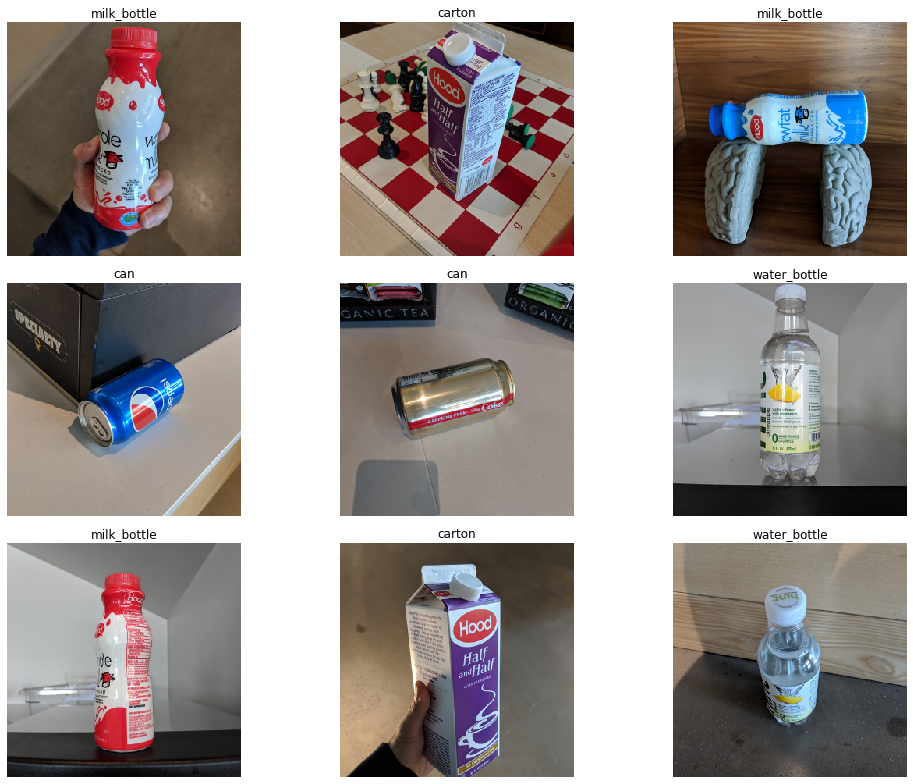

In [6]:
data.show_batch(rows=3, figsize=(15,11))

In [7]:
print(f'number of classes: {data.c}')
print(data.classes)

number of classes: 4
['can', 'carton', 'milk_bottle', 'water_bottle']


In [8]:
data.batch_stats

<bound method ImageDataBunch.batch_stats of ImageDataBunch;

Train: LabelList (108 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
carton,carton,carton,carton,carton
Path: /data/home/byteb/notebooks/batchinference/data/fridgeObjects;

Valid: LabelList (26 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
water_bottle,water_bottle,water_bottle,can,can
Path: /data/home/byteb/notebooks/batchinference/data/fridgeObjects;

Test: None>

# Train a Model

For this image classifier, we use a **ResNet18** convolutional neural network (CNN) architecture. You can find more details about ResNet from [here](https://arxiv.org/abs/1512.03385).

When training CNN, there are almost an infinite number of ways to construct the model architecture. We need to determine how many and what type of layers to include and how many nodes make up each layer. Other hyperparameters that control the training of those layers are also important and add to the overall complexity of neural net methods. With fast.ai, we use the `create_cnn` function to specify the model architecture and performance metric. We will use a transfer learning approach to reuse the CNN architecture and initialize the model parameters used to train on [ImageNet](http://www.image-net.org/).

In this work, we use a custom callback `TrainMetricsRecorder` to track the model accuracy on the training set as we tune the model. This is for instruction only, as the standard approach in `fast.ai` [recorder class](https://docs.fast.ai/basic_train.html#Recorder) only supports tracking model accuracy on the validation set.

In [9]:
learn = cnn_learner(
    data,
    ARCHITECTURE,
    metrics=[accuracy],
    callback_fns=[partial(TrainMetricsRecorder, show_graph=True)]
)

In [10]:
learn.unfreeze()

epoch,train_loss,valid_loss,train_accuracy,valid_accuracy,time
0,1.387334,2.242829,0.489583,0.269231,00:08
1,1.150318,1.022673,0.677083,0.653846,00:02
2,0.820866,0.715048,0.916667,0.807692,00:02
3,0.619237,0.645389,0.958333,0.769231,00:02
4,0.484262,0.593075,0.968750,0.769231,00:02
5,0.390708,0.521111,0.989583,0.807692,00:02
6,0.321947,0.490508,1.000000,0.807692,00:02
7,0.271440,0.464632,0.989583,0.846154,00:02
8,0.228570,0.471814,1.000000,0.807692,00:02
9,0.195971,0.460522,0.989583,0.846154,00:02


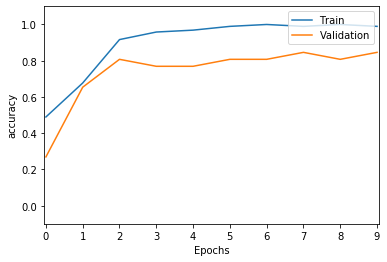

In [11]:
learn.fit(EPOCHS, LEARNING_RATE)

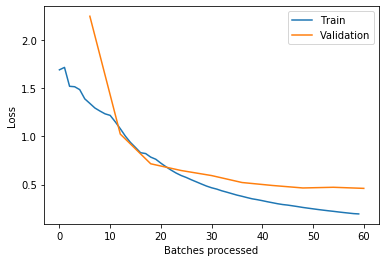

In [12]:
# You can plot loss by using the default callback Recorder.
learn.recorder.plot_losses()

# Validate the model

To validate the model, calculate the model accuracy using the validation set.

In [13]:
_, validation_accuracy = learn.validate(learn.data.valid_dl, metrics=[accuracy])
print(f'Accuracy on validation set: {100*float(validation_accuracy):3.2f}')

Accuracy on validation set: 84.62


In [14]:
interp = ClassificationInterpretation.from_learner(learn)
# Get prediction scores. We convert tensors to numpy array to plot them later.
pred_scores = to_np(interp.preds)

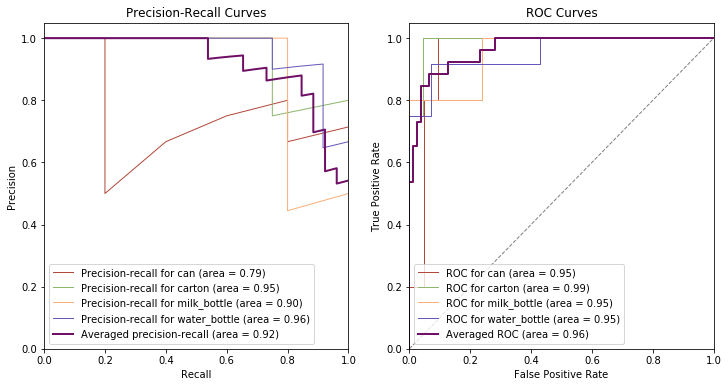

In [15]:
# True labels of the validation set. We convert to numpy array for plotting.
true_labels = to_np(interp.y_true)
plot_pr_roc_curves(true_labels, pred_scores, data.classes)

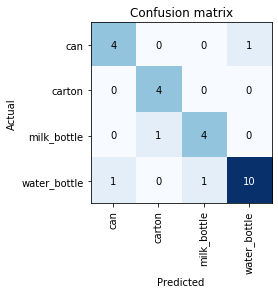

In [16]:
interp.plot_confusion_matrix()

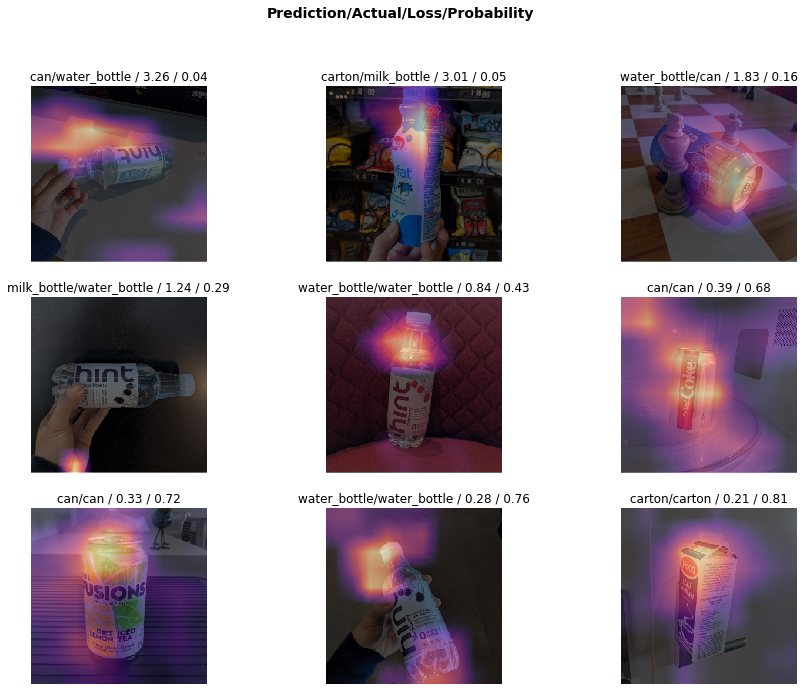

In [17]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

# Save Model

In [18]:
learn.model.cuda()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [20]:
## Save model as .pth file
learn.save("/home/byteb/notebooks/batchinference/models/model-resnet18")

In [21]:
## Save model as pickle (.pkl) file
learn.export(file = Path("/home/byteb/notebooks/batchinference/models/model-resnet18.pkl"))